| Biến                        | Mô tả                                                                 |
|-----------------------------|----------------------------------------------------------------------|
| `BALANCE`                   | Số dư còn lại trong tài khoản để thực hiện mua sắm                  |
| `BALANCE_FREQUENCY`         | Tần suất cập nhật số dư, giá trị từ 0 đến 1 (1 = cập nhật thường xuyên) |
| `PURCHASES`                 | Tổng số tiền đã mua sắm từ tài khoản                                |
| `ONEOFF_PURCHASES`          | Giá trị lớn nhất của một lần mua hàng đơn lẻ                        |
| `INSTALLMENTS_PURCHASES`    | Tổng giá trị mua hàng theo hình thức trả góp                        |
| `CASH_ADVANCE`              | Số tiền mặt được ứng trước bởi người dùng                           |
| `PURCHASES_FREQUENCY`       | Tần suất thực hiện các giao dịch mua sắm (0 đến 1)                  |
| `ONEOFF_PURCHASES_FREQUENCY`| Tần suất thực hiện các giao dịch mua đơn lẻ (0 đến 1)               |
| `PURCHASES_INSTALLMENTS_FREQUENCY` | Tần suất mua hàng trả góp (0 đến 1)                          |
| `CASH_ADVANCE_FREQUENCY`    | Tần suất ứng trước tiền mặt (0 đến 1)                               |
| `CASH_ADVANCE_TRX`          | Số lượng giao dịch ứng trước tiền mặt                               |
| `PURCHASES_TRX`             | Số lượng giao dịch mua hàng                                         |
| `CREDIT_LIMIT`              | Hạn mức tín dụng của thẻ đối với người dùng                         |
| `PAYMENTS`                  | Tổng số tiền người dùng đã thanh toán                               |
| `MINIMUM_PAYMENTS`          | Khoản thanh toán tối thiểu người dùng đã trả                        |
| `PRC_FULL_PAYMENT`          | Tỷ lệ phần trăm thanh toán toàn bộ nợ                              |
| `TENURE`                    | Thời gian sử dụng thẻ tín dụng của người dùng                       |


**Chỉ dùng các features trên để phân cụm**

# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/Clustered_Customer_Data.csv")

In [ ]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,3
3,3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


# Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        8950 non-null   int64  
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

# Data Preprocessing

In [ ]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [ ]:
# Check Missing values
df[categorical_cols].isnull().sum()

,0


In [ ]:
# Check Missing columns
df[numerical_cols].isnull().sum()

,0
Unnamed: 0,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


<ipython-input-9-04b6fc8ceda2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
<ipython-input-9-04b6fc8ceda2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
<ipython-input-9-04b6fc8ceda2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
<ipython-input-9-04b6fc8ceda2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` 

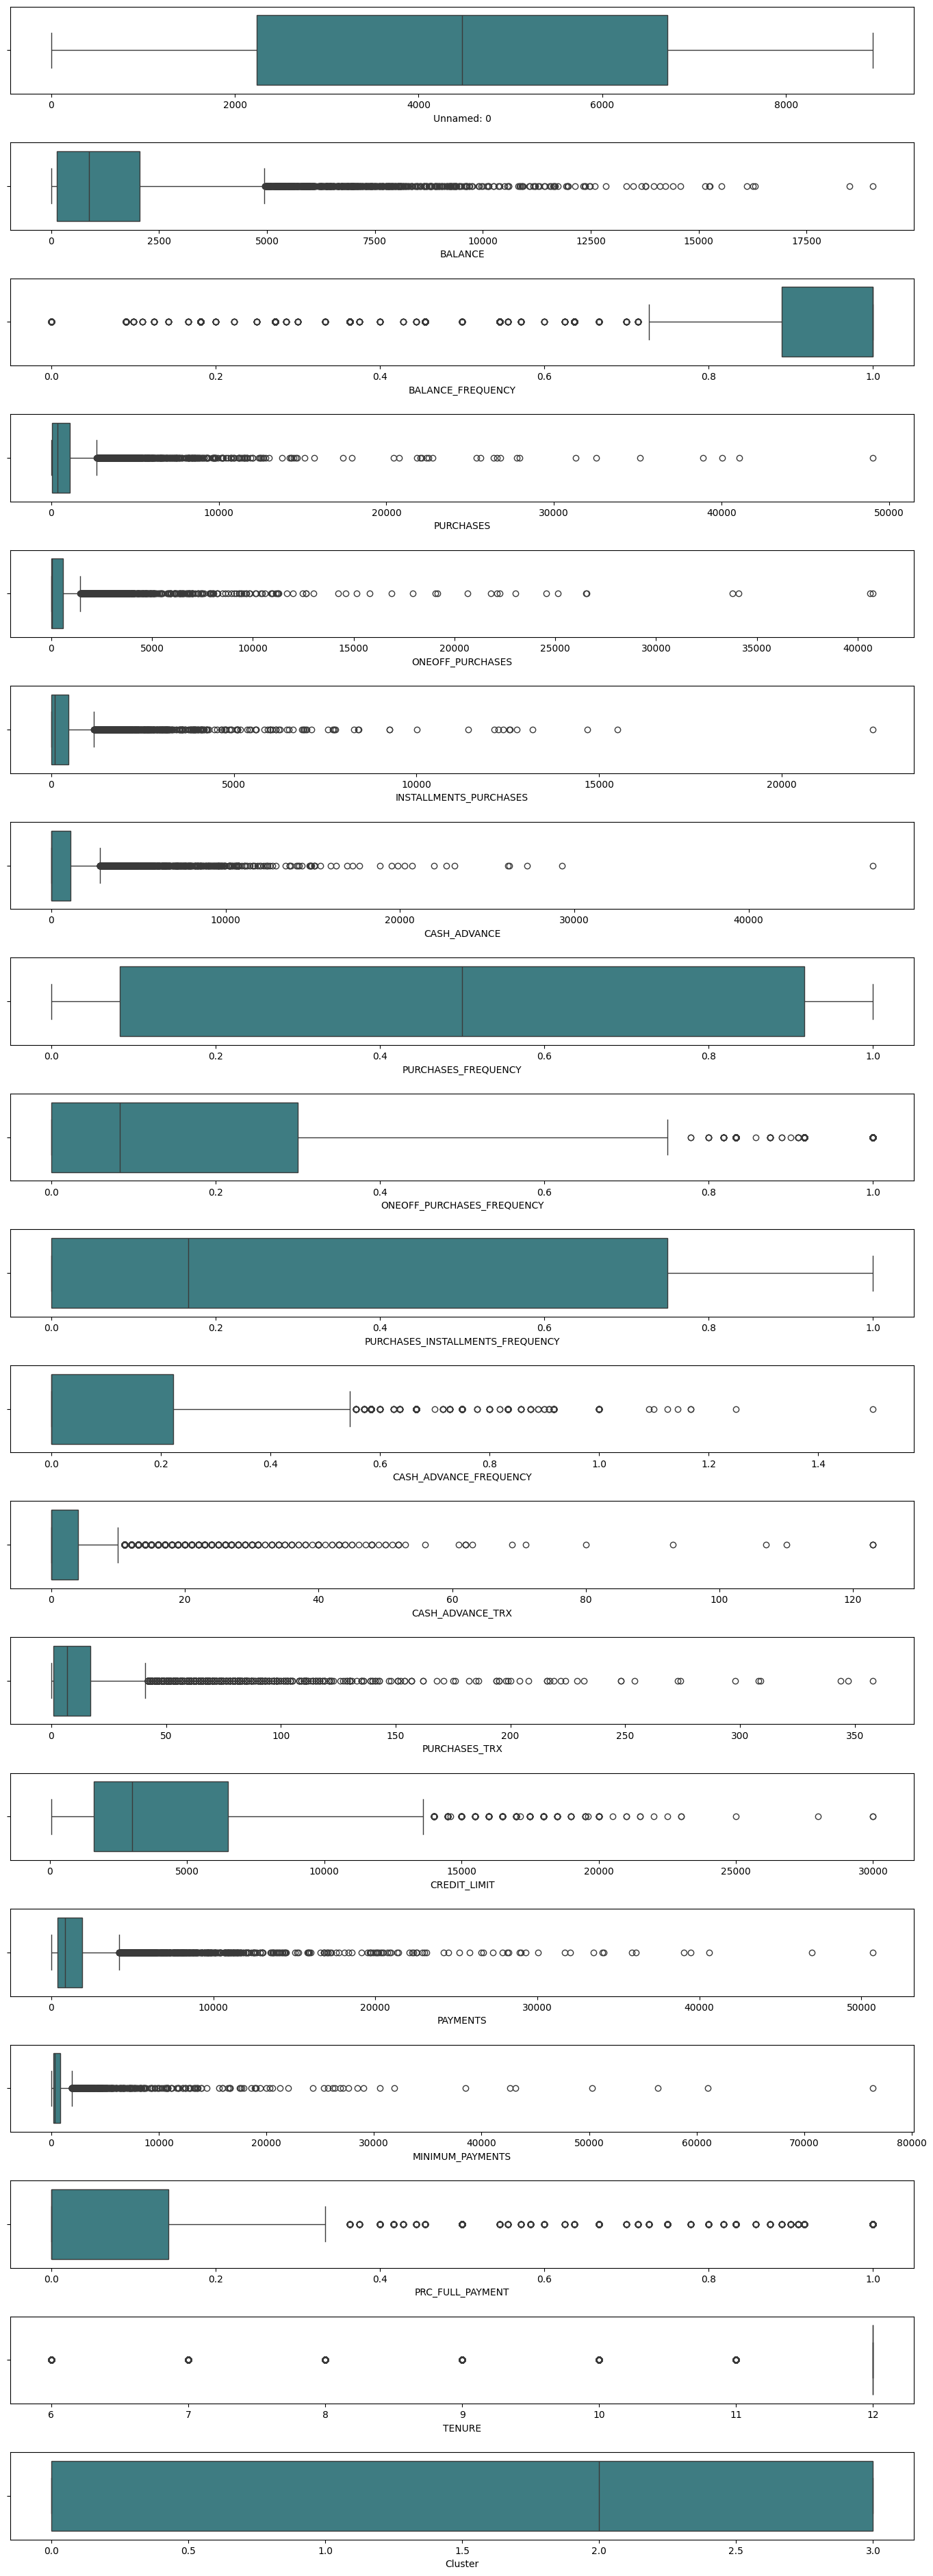

In [ ]:
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

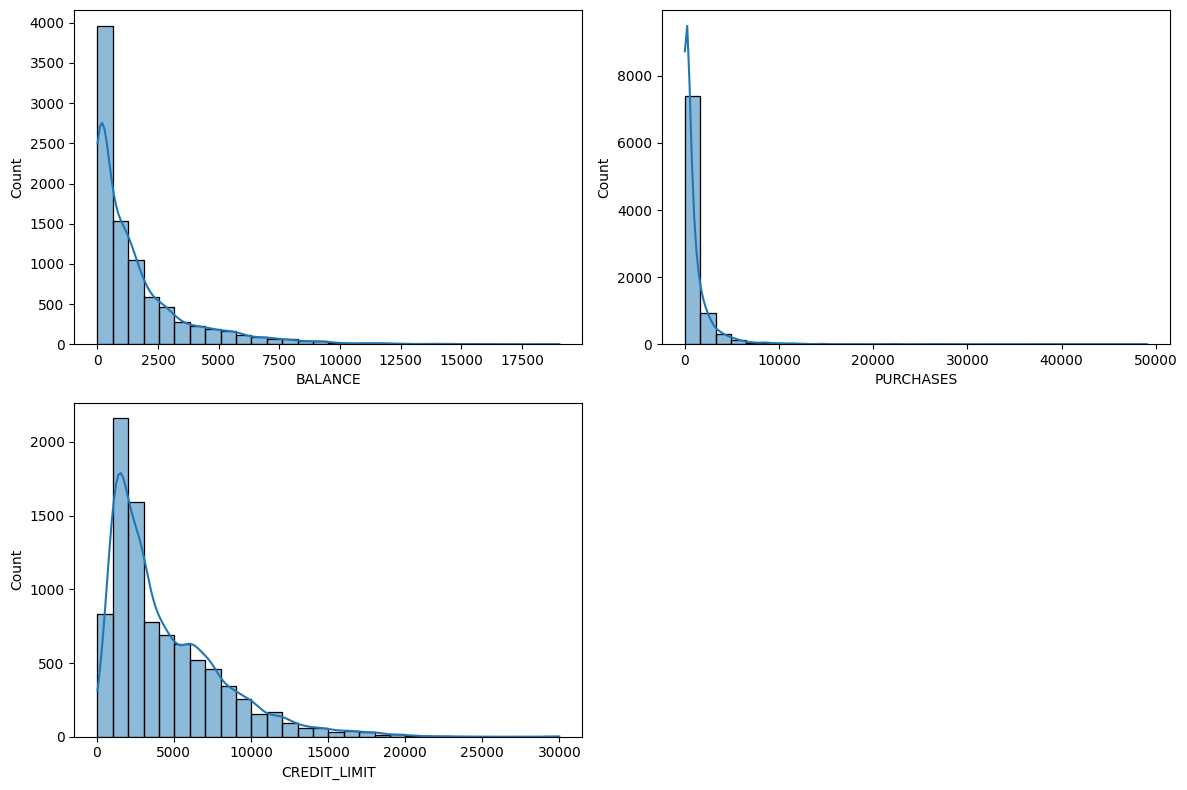

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(x="BALANCE", data=df, kde=True, bins=30, ax=axes[0, 0])

sns.histplot(x="PURCHASES", data=df, kde=True, bins=30, ax=axes[0, 1])

sns.histplot(x="CREDIT_LIMIT", data=df, kde=True, bins=30, ax=axes[1, 0])

axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Feature Engineering

In [ ]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    if 'Unnamed' in df.columns:
        df.drop("Unnamed", axis=1, inplace=True)
    return df

In [ ]:
def handle_outliers(df, column):
    """
    Xử lý ngoại lệ bằng cách thay thế bằng giá trị tại phân vị 95.
    """
    Q95 = df[column].quantile(0.95)
    df.loc[df[column] > Q95, column] = Q95
    return df

df = handle_outliers(df, 'BALANCE')

In [ ]:
import numpy as np

df['BALANCE_log'] = np.log(df['BALANCE'] + 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

cols_to_scale = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']
df[cols_to_scale] = StandardScaler().fit_transform(df[cols_to_scale])

In [ ]:
df.head()

,Unnamed: 0,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster,BALANCE_log
0,0,-0.835513,0.818182,-0.424900,0.00,95.4,-0.466786,0.166667,0.000000,0.083333,0.000000,0,2,-0.960433,-0.528979,139.509787,0.000000,12,0,3.735304
1,1,1.036275,0.909091,-0.469552,0.00,0.0,2.605605,0.000000,0.000000,0.000000,0.250000,4,0,0.688639,0.818642,1072.340217,0.222222,12,2,8.071989
2,2,0.617511,1.000000,-0.107668,773.17,0.0,-0.466786,1.000000,1.000000,0.000000,0.000000,0,12,0.826062,-0.383805,627.284787,0.000000,12,3,7.822504
3,3,0.127015,0.636364,0.232058,1499.00,0.0,-0.368653,0.083333,0.083333,0.000000,0.083333,1,1,0.826062,-0.598688,864.206542,0.000000,12,0,7.419183
4,4,-0.375604,1.000000,-0.462063,16.00,0.0,-0.466786,0.083333,0.083333,0.000000,0.000000,0,1,-0.905464,-0.364368,244.791237,0.000000,12,0,6.707735


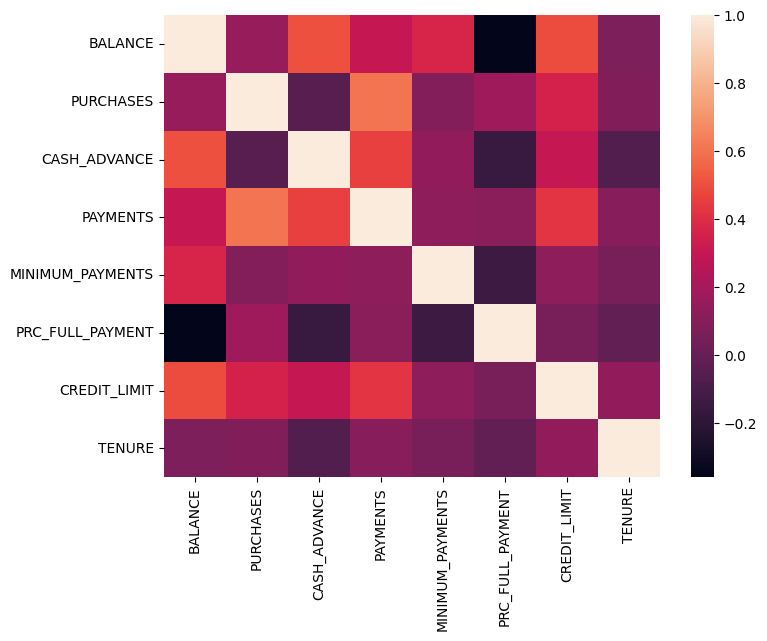

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

important_cols = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS',
                  'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'CREDIT_LIMIT', 'TENURE']

corr = df[important_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr)
plt.show()


# Model Part

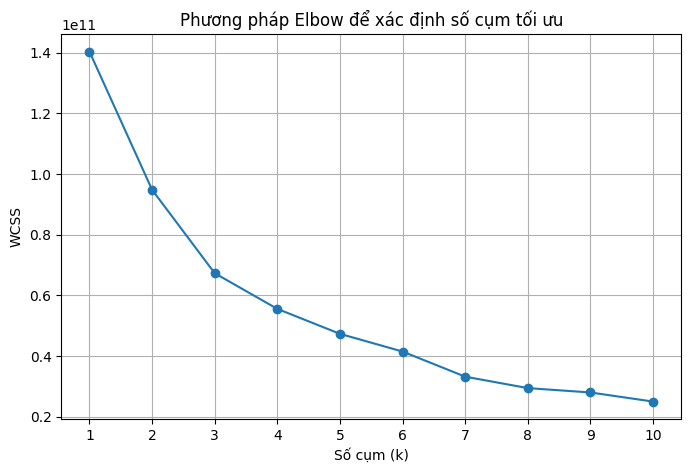

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Phương pháp Elbow để xác định số cụm tối ưu')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

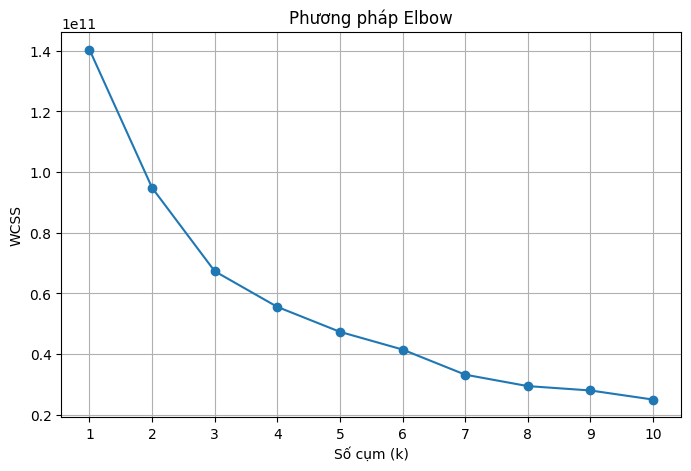

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss, marker='o')
plt.title('Phương pháp Elbow')
plt.xlabel('Số cụm (k)')
plt.ylabel('WCSS')
plt.xticks(K_range)
plt.grid(True)
plt.show()


Observe the 'elbow' point on the graph to select the optimal number of clusters k = 4.

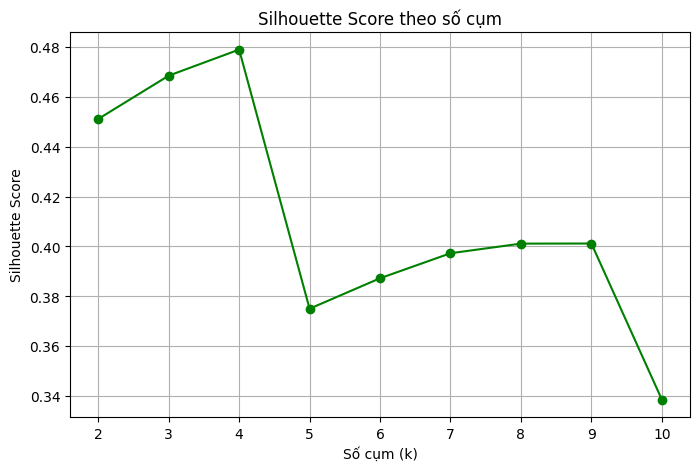

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score theo số cụm')
plt.xlabel('Số cụm (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Choose k at the highest value k = 4.

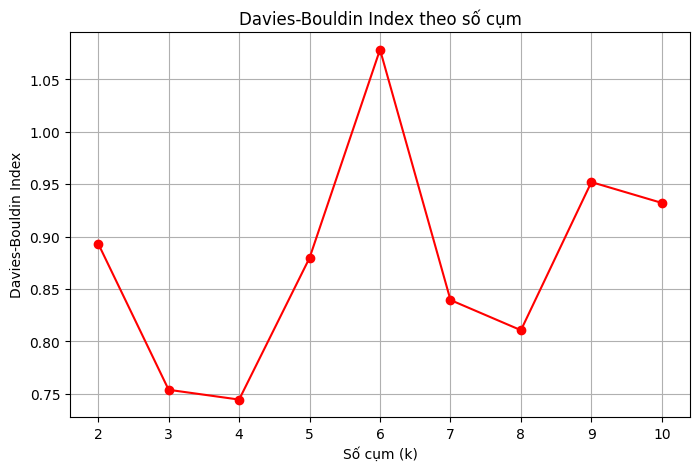

In [ ]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(df)
    score = davies_bouldin_score(df, labels)
    db_scores.append(score)

plt.figure(figsize=(8,5))
plt.plot(K_range, db_scores, marker='o', color='red')
plt.title('Davies-Bouldin Index theo số cụm')
plt.xlabel('Số cụm (k)')
plt.ylabel('Davies-Bouldin Index')
plt.grid(True)
plt.show()

Select k at the minimum value, k = 4.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('kmeans', KMeans(n_clusters=4, random_state=42))
])

pipeline.fit(df)

labels = pipeline.named_steps['kmeans'].labels_

df['Cluster_Pipeline'] = labels


In [ ]:
from sklearn.cluster import DBSCAN

pipeline_dbscan = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('dbscan', DBSCAN(eps=0.5, min_samples=5))
])

pipeline_dbscan.fit(df)
labels_db = pipeline_dbscan.named_steps['dbscan'].labels_
df['Cluster_DBSCAN'] = labels_db


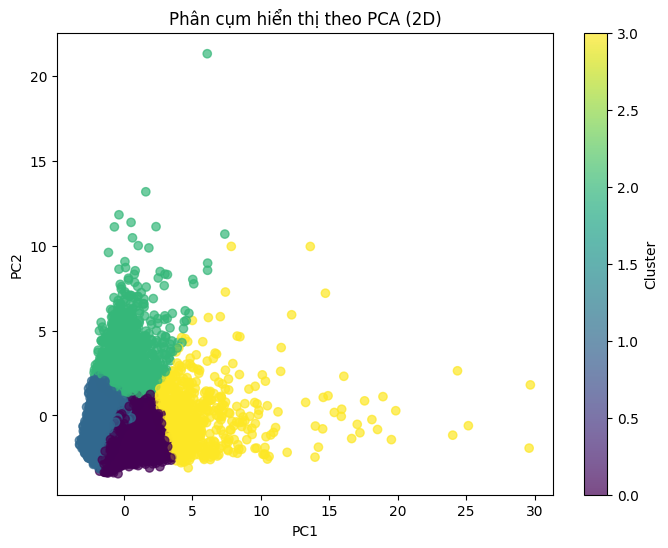

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

all_numerical_cols_for_clustering = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT', # Scaled columns
                                     'BALANCE_FREQUENCY', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                                     'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                                     'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                                     'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'BALANCE_log'] # Other numerical columns and the log-transformed one


df_clustering_features = df[all_numerical_cols_for_clustering].copy().dropna()

scaler = StandardScaler()
df_scaled_features = scaler.fit_transform(df_clustering_features)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled_features)

if 'labels' in locals() and len(labels) == df_pca.shape[0]:
    plt.figure(figsize=(8,6))
    plt.scatter(df_pca[:,0], df_pca[:,1], c=labels, cmap='viridis', alpha=0.7)
    plt.title("Phân cụm hiển thị theo PCA (2D)")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.colorbar(label="Cluster")
    plt.show()
else:
    print("Labels for plotting are not available or do not match the dimensions of PCA data.")
    print("Please ensure the clustering step (e.g., KMeans pipeline) was run correctly on the same features used for PCA.")

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

print("Silhouette Score:", silhouette_score(df_scaled_features, labels))
print("Davies-Bouldin Index:", davies_bouldin_score(df_scaled_features, labels))
print("Calinski-Harabasz Index:", calinski_harabasz_score(df_scaled_features, labels))

Silhouette Score: 0.16784300843202496
Davies-Bouldin Index: 1.7084277266744423
Calinski-Harabasz Index: 1524.2145810029683


# Discussion & Conclusion

After performing a thorough data analysis process, including handling missing values and outliers, applying logarithmic transformations, and normalizing important features, the KMeans clustering model was implemented. By analyzing metrics such as WCSS (Elbow method), Silhouette Score (achieving 0.41), and Davies-Bouldin Index, the optimal number of clusters was determined to be k = 4.

The KMeans model with 4 clusters was trained on the normalized dataset and dimensionality reduced by PCA for easier visualization in 2D space. The scatter plot shows relatively clear separation between clusters, supporting the choice of the number of clusters. Internal evaluation metrics like the Silhouette and Calinski-Harabasz Index (high values) confirmed an acceptable clustering quality.

An important step after clustering is analyzing the characteristics of each customer group. By calculating descriptive statistics (mean values) of key features in each cluster, we identified the following typical profiles:

Cluster 0: Customers with low BALANCE (average -0.46), average shopping spending (PURCHASES) around 0.05, and low cash advances (CASH_ADVANCE at -0.40). Payment amounts (PAYMENTS) are low (-0.17), minimum payments (MINIMUM_PAYMENTS) are relatively low (523.67), and the full payment rate (PRC_FULL_PAYMENT) is fairly high (0.29). Credit limits (CREDIT_LIMIT) are below average (-0.14). Card tenure (TENURE) is about 11.6 months. This group likely consists of cautious card users who spend little and try to pay off balances fully.

Cluster 1: Customers with below-average BALANCE (-0.38), the lowest shopping spending (PURCHASES) among all clusters (-0.35), and low cash advances (CASH_ADVANCE at -0.22). They have the lowest payments (PAYMENTS) at -0.30, lowest minimum payments (MINIMUM_PAYMENTS) at 480.31, and very low full payment rate (PRC_FULL_PAYMENT) at 0.07. Credit limits (CREDIT_LIMIT) are the lowest (-0.41). Card tenure is about 11.4 months. This cluster appears to be the least active users or possibly those with limited financial capacity.

Cluster 2: Customers with the highest BALANCE (1.38), below-average shopping spending (PURCHASES) at -0.27, but very high cash advances (CASH_ADVANCE) at 1.29. Payments (PAYMENTS) are above average (0.42), minimum payments (MINIMUM_PAYMENTS) are very high (1962.82), and the full payment rate (PRC_FULL_PAYMENT) is very low (0.02). Credit limits (CREDIT_LIMIT) are above average (0.68). Tenure is around 11.5 months. This group is characterized by frequent cash advances with high outstanding balances and large minimum payments, possibly users who rely on credit for short-term cash needs.

Cluster 3: Customers with high BALANCE (0.81), very high shopping spending (PURCHASES), the highest among clusters (2.25), and low cash advances (CASH_ADVANCE at -0.06). Payments (PAYMENTS) are very high (1.39), the highest among clusters, minimum payments (MINIMUM_PAYMENTS) are high (1820.45), and full payment rate (PRC_FULL_PAYMENT) is fairly high (0.23). Credit limits (CREDIT_LIMIT) are the highest (1.24). Tenure is the longest, close to 12 months. This cluster clearly represents the highest spending customers with high credit limits and good payment ability. They can be considered premium customers.

Segmenting customers into these four clearly defined groups provides deep insights for business strategies. The company can leverage this information to:

Design personalized marketing campaigns and offers tailored to each group (e.g., encouraging shopping for Cluster 1, providing debt solutions for Cluster 2, special offers for Cluster 3).

Assess different credit risks (Cluster 2 may have higher risk due to cash advance behavior and low full payment rates).

Develop financial products or services suited to the specific needs of each segment.

Build customer retention strategies based on behavior and value.

Some limitations of this analysis include dependency on input data and model parameter choices. Future directions could involve experimenting with more advanced clustering algorithms, exploring other dimensionality reduction techniques, or integrating additional data sources to enrich customer profiles, thereby achieving clearer and more meaningful cluster separation.